In [1]:
############################
###IMPORT
############################

In [2]:
#Numerical computation library
import numpy as np 
#Data manipulation and analysis
import pandas as pd 
#Plotting library
import matplotlib.pyplot as plt 
# Scientific computing library #provides additional functionality for optimization, integration, interpolation, linear algebra
import scipy as sp 
#Feature extraction from raw data
from sklearn import feature_extraction 
#Functions for model selection and evaluation('train_test_split','cross-validation')
from sklearn import model_selection 
#Naive_Bayes algorithm for classification
from sklearn import naive_bayes 
#Evaluating machine learning models
from sklearn import metrics 


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
#Reading the Dataset
dataset = pd.read_csv("C:\\Users\\Sanjay\\Desktop\\CIE\\Dataset\\spam.csv", encoding='latin-1')


In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Removing unnamed columns
dataset = dataset.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [6]:

dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})

In [8]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

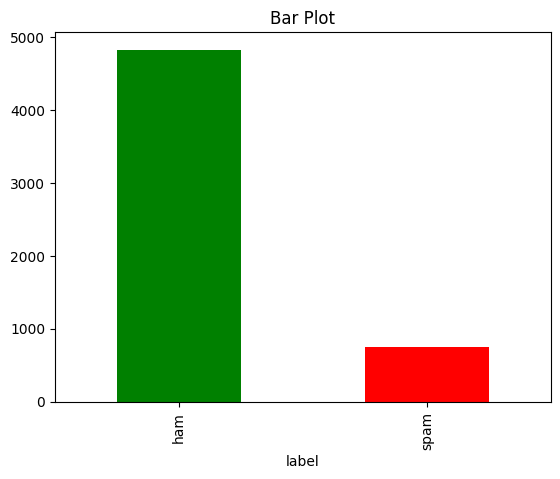

In [10]:
count_Class=pd.value_counts(dataset["label"])
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

In [11]:
# CountVectorizer class from scikit-learn to convert text data into a matrix of token counts
f = feature_extraction.text.CountVectorizer(stop_words = 'english') 
#Fits the CountVectorizer f to the text data in the "message" column of the DataFrame dataset and transforms the text data into a matrix of token counts
X = f.fit_transform(dataset["message"])
np.shape(X)

(5572, 8404)

## Implementing Naive Bayes

In [12]:
# Classifying spam and not spam msgs as 1 and 0

#Mapping the values in the "label" column of the DataFrame dataset to numerical values 1 and 0
dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
#Random seed for reproducibility. Ensures that the random splitting of data is consistent across multiple runs of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, dataset['label'], test_size=0.70, random_state=42) 


In [13]:
#Create an array of range of values #(start,end,step)
list_alpha = np.arange(0.001,20,0.01)

# Initialize four arrays (score_train, score_test, recall_test, precision_test) with zeros
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))

#To keep track of current index
count = 0 

#Loop iterates over different alpha values, trains a Multinomial Naive Bayes classifier for each value, and evaluates its performance on both the training and testing data, storing the results in arrays for further analysis

for alpha in list_alpha:
    #Multinomial Naive Bayes classifier object bayes is created for each alpha value
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    # Training
    bayes.fit(X_train, y_train)
    #Accuracy score of the trained classifier on the training data is calculated and stored in the score_train array at the index count
    score_train[count] = bayes.score(X_train, y_train) 
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1



In [14]:
# Convert this concatenated array into a matrix
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
#Creates a pandas DataFrame models using the data from the matrix
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision']) 
models.head(n=10)


,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.001,0.998803,0.964368,0.936782,0.821849
1,0.011,0.998803,0.963086,0.936782,0.815000
2,0.021,0.998803,0.963343,0.942529,0.813223
3,0.031,0.998803,0.962830,0.942529,0.810544
4,0.041,0.998803,0.964112,0.942529,0.817276
5,0.051,0.998803,0.962830,0.942529,0.810544
6,0.061,0.998803,0.962830,0.942529,0.810544
7,0.071,0.998803,0.962830,0.942529,0.810544
8,0.081,0.998205,0.966419,0.944444,0.828571
9,0.091,0.998803,0.966419,0.946360,0.827471


In [15]:
#Calculates the index of the row where the "Test Precision" column has the maximum value
best_index = models['Test Precision'].idxmax() 
#Retrieves the row from the DataFrame models at the index specified by best_index
models.iloc[best_index, :]

alpha             10.581000
Train Accuracy     0.977259
Test Accuracy      0.962574
Test Recall        0.720307
Test Precision     1.000000
Name: 1058, dtype: float64

## Doing the Predictions from the Model

In [16]:
# Create a new instance of the Naive Bayes classifier with the optimal alpha value
best_alpha = models.iloc[best_index]['alpha']
best_bayes = naive_bayes.MultinomialNB(alpha=best_alpha)

In [17]:
# Fit the classifier with the entire dataset (or the subset you want to use for prediction)
best_bayes.fit(X, dataset['label'])  # Assuming you want to use the entire dataset for prediction


MultinomialNB(alpha=10.580999999999998)

In [18]:
def prediction(text):
  X_new = f.transform(text)
  predictions = best_bayes.predict(X_new)
  if (predictions==0):
    print("Not a spam")
  else:
    print("A spam message")


In [19]:
new_messages = ["You have won a free ticket to las vegas. Contact now"]
prediction(new_messages)

A spam message


In [20]:
# Convert 'new_messages' into the same format as 'X' using the CountVectorizer 'f'
new_messages = ["Hey there, how are you?"]
prediction(new_messages)

Not a spam
